In [1]:
import os, sys
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

from os.path import join 
from sklearn import preprocessing
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from IPython.display import display_html

import warnings
warnings.filterwarnings("ignore")

In [2]:
DataPath = r'D:\GitWork\titanic\data'
OutPath  = r'D:\GitWork\titanic\output'

csv_train = 'train.csv'
csv_test  = 'test.csv'

In [3]:
f_abspath = join(DataPath, csv_train)
df_train = pd.read_csv(f_abspath)
display(df_train.info())
display(df_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
f_abspath = join(DataPath, csv_test)
df_test = pd.read_csv(f_abspath)
display(df_test.info())
display(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_data = df_train.append(df_test)
display(df_data.info())
display(df_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# process Sex
le_sex = LabelEncoder()
df_data['SexCode'] = le_sex.fit_transform(df_data.Sex)
display(df_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [7]:
# Process Fare

# Fill null value
mean_fare = df_data.Fare.mean()
df_data.Fare.fillna(mean_fare, inplace=True)
display(df_data.info())

df_data['FareBin_4'] = pd.qcut(df_data.Fare, 4)
df_data['FareBin_5'] = pd.qcut(df_data.Fare, 5)
df_data['FareBin_6'] = pd.qcut(df_data.Fare, 6)
display(df_data.head())

def classes2dict(le):
    return {
        le.transform([x])[0]: x for x in le.classes_
    }

le_fb4 = LabelEncoder()
le_fb5 = LabelEncoder()
le_fb6 = LabelEncoder()

df_data['FareBinCode_4'] = le_fb4.fit_transform(df_data.FareBin_4)
df_data['FareBinCode_5'] = le_fb5.fit_transform(df_data.FareBin_5)
df_data['FareBinCode_6'] = le_fb6.fit_transform(df_data.FareBin_6)

dict_b4 = classes2dict(le_fb4)
dict_b5 = classes2dict(le_fb5)
dict_b6 = classes2dict(le_fb6)

print('Dict B4:'); display(dict_b4)
print('\nDict B5:'); display(dict_b5)
print('\nDict B6:'); display(dict_b6)

df_data.drop(['FareBin_4', 'FareBin_5','FareBin_6'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  SexCode      1309 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 138.1+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,FareBin_4,FareBin_5,FareBin_6
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.896]","(-0.001, 7.854]","(-0.001, 7.775]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,"(31.275, 512.329]","(41.579, 512.329]","(53.1, 512.329]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,"(31.275, 512.329]","(41.579, 512.329]","(26.0, 53.1]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(7.896, 14.454]","(7.854, 10.5]","(7.775, 8.662]"


Dict B4:


{0: Interval(-0.001, 7.896, closed='right'),
 1: Interval(7.896, 14.454, closed='right'),
 2: Interval(14.454, 31.275, closed='right'),
 3: Interval(31.275, 512.329, closed='right')}


Dict B5:


{0: Interval(-0.001, 7.854, closed='right'),
 1: Interval(7.854, 10.5, closed='right'),
 2: Interval(10.5, 21.679, closed='right'),
 3: Interval(21.679, 41.579, closed='right'),
 4: Interval(41.579, 512.329, closed='right')}


Dict B6:


{0: Interval(-0.001, 7.775, closed='right'),
 1: Interval(7.775, 8.662, closed='right'),
 2: Interval(8.662, 14.454, closed='right'),
 3: Interval(14.454, 26.0, closed='right'),
 4: Interval(26.0, 53.1, closed='right'),
 5: Interval(53.1, 512.329, closed='right')}

Pclass,1,2,3,Total
FareBinCode_4,,,,
0,8,6,323,337
1,0,128,192,320
2,77,104,147,328
3,238,39,47,324
Total,323,277,709,1309
Pclass,1,2,3,Total
FareBinCode_5,,,,
0,8,6,261,275
1,0,36,218,254


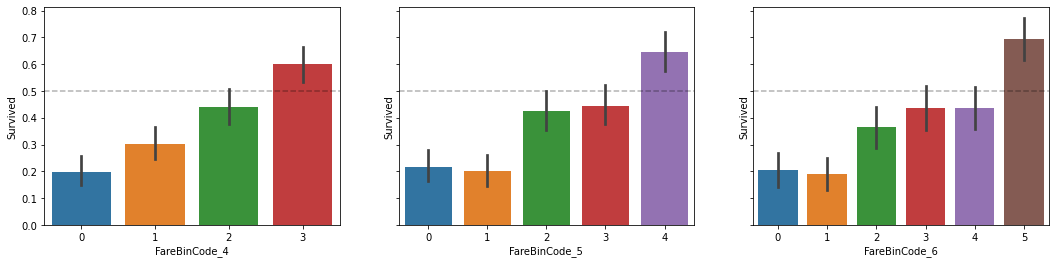

In [8]:
kwargs = { 'margins': True, 'margins_name': 'Total' }
df_B4 = pd.crosstab(df_data.FareBinCode_4, df_data.Pclass, **kwargs)
df_B5 = pd.crosstab(df_data.FareBinCode_5, df_data.Pclass, **kwargs)
df_B6 = pd.crosstab(df_data.FareBinCode_6, df_data.Pclass, **kwargs)

# df_B4 = pd.crosstab([df_data.FareBin4_Code, df_data.Survived], df_data.Pclass, **kwargs)
# df_B5 = pd.crosstab([df_data.FareBin5_Code, df_data.Survived], df_data.Pclass, **kwargs)
# df_B6 = pd.crosstab([df_data.FareBin6_Code, df_data.Survived], df_data.Pclass, **kwargs)

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline;margin:40px"'), raw=True)
    return

display_side_by_side(df_B4, df_B5, df_B6)

fig, axes = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(18)

for ax in axes:
    ax.axhline(0.5, linestyle='dashed', c='black', alpha=0.3)
g0 = sns.barplot(x='FareBinCode_4', y='Survived', data=df_data, ax=axes[0])
g1 = sns.barplot(x='FareBinCode_5', y='Survived', data=df_data, ax=axes[1])
g2 = sns.barplot(x='FareBinCode_6', y='Survived', data=df_data, ax=axes[2])

plt.show()

In [9]:
len_train = len(df_train)
df_tmp = df_data[:len_train]
display(df_tmp.head())
display(df_tmp.info())

features = ['SexCode', 'Pclass', 'FareBinCode_4', 'FareBinCode_5', 'FareBinCode_6']
X = df_tmp[features]
Y = df_tmp['Survived']

selector = RFECV(RandomForestClassifier(n_estimators=250, min_samples_split=20), cv=10, n_jobs=-1)
selector.fit(X, Y)
print(selector.support_)
print(selector.ranking_)
print(selector.grid_scores_*100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,FareBinCode_4,FareBinCode_5,FareBinCode_6
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,3,4,5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3,4,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    float64
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  SexCode        891 non-null    int32  
 13  FareBinCode_4  891 non-null    int32  
 14  FareBinCode_5  891 non-null    int32  
 15  FareBinCode_6  891 non-null    int32  
dtypes: float64(3), int32(4), int64(4), object(5)
memory usage: 104.4+ KB


None

[ True  True  True  True  True]
[1 1 1 1 1]
[78.67290886 77.556804   79.01747815 79.35580524 80.47565543]


0: [0.79902622 0.79014981 0.79350811]
1: [0.80248439 0.80362047 0.80585518]
2: [0.79796504 0.79907615 0.80695381]
3: [0.7911985  0.80243446 0.80694132]
4: [0.79128589 0.80138577 0.79913858]
5: [0.80252185 0.80699126 0.81032459]
6: [0.792397   0.80583021 0.80695381]
7: [0.79012484 0.80579276 0.80913858]
8: [0.78910112 0.79921348 0.80370787]
9: [0.79684145 0.80245943 0.80245943]


<AxesSubplot:>

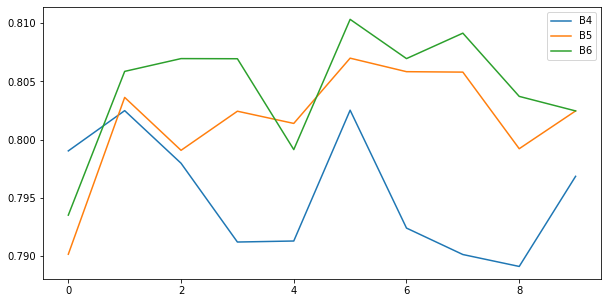

In [10]:
# Consider random_state and Cross-Validation
df_score = pd.DataFrame(columns=['B4', 'B5', 'B6'])

n_splits = 10
for i in range(n_splits):
    diff_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=i)
    selector = RFECV(
        RandomForestClassifier(n_estimators=250, min_samples_split=20), 
        cv = diff_cv, 
        n_jobs = -1
    )
    selector.fit(X, Y)
    scores = selector.grid_scores_[2:5]
    print('{}: {}'.format(i, scores))
    df_score.loc[len(df_score)] = scores
    
# display(df_score)
df_score.plot(figsize=(10,5))    

In [11]:
len_train = len(df_train)
ds_train = df_data[:len_train]
print(ds_train.columns); print()

features4 = ['SexCode', 'Pclass', 'FareBinCode_4']
features5 = ['SexCode', 'Pclass', 'FareBinCode_5']
features6 = ['SexCode', 'Pclass', 'FareBinCode_6']

inp4 = ds_train[features4]
inp5 = ds_train[features5]
inp6 = ds_train[features6]
lbls = ds_train.Survived

model_b4 = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)
model_b4.fit(inp4, lbls)
print('oob score :%f' %(model_b4.oob_score_))

model_b5 = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)
model_b5.fit(inp5, lbls)
print('oob score :%f' %(model_b5.oob_score_))

model_b6 = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)
model_b6.fit(inp6, lbls)
print('oob score :%f' %(model_b6.oob_score_))

dict_scores = {
    4: model_b4.oob_score_, 
    5: model_b5.oob_score_,
    6: model_b6.oob_score_
}

import operator
best_model_num = max(dict_scores, key=dict_scores.get)
print('\nBest model:', best_model_num)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'SexCode',
       'FareBinCode_4', 'FareBinCode_5', 'FareBinCode_6'],
      dtype='object')

oob score :0.805836
oob score :0.810325
oob score :0.801347

Best model: 5


In [12]:
# Prediction
len_train = len(df_train)
ds_test = df_data[len_train:]

features = ['SexCode', 'Pclass', 'FareBinCode_5']
inps = ds_test[features]
display(inps.head())
display(inps.info())

ds_test['Survived'] = model_b5.predict(inps).astype(int)
display(ds_test.head())

,SexCode,Pclass,FareBinCode_5
0,1,3,0
1,0,3,0
2,1,2,1
3,1,3,1
4,0,3,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SexCode        418 non-null    int32
 1   Pclass         418 non-null    int64
 2   FareBinCode_5  418 non-null    int32
dtypes: int32(2), int64(1)
memory usage: 9.8 KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,FareBinCode_4,FareBinCode_5,FareBinCode_6
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,0,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,1,2
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1,2,2


In [13]:
# Save predict result to xlsx
f_abspath = join(OutPath, 'Submission_v3_1.csv')

features = ['PassengerId', 'Survived']
ds_test[features].to_csv(f_abspath, index=False)